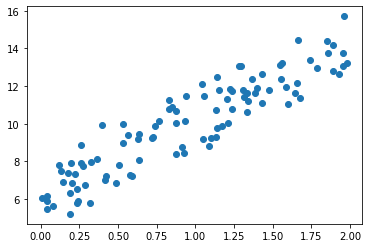

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
x = 2*np.random.rand(100,1)
y=6+4*x+np.random.randn(100,1)

plt.scatter(x,y)

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
    N=len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(x, w1.T)+w0 # 행렬 연산
    diff = y-y_pred
    
    w0_factors=np.ones((N,1)) 
    
    w1_update=-(2/N)*learning_rate*(np.dot(x.T, diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(x,y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)
        w1=w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(x,y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*x+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


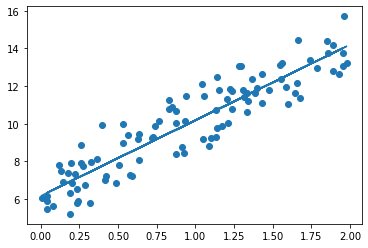

In [6]:
plt.scatter(x,y)
plt.plot(x, y_pred)

### (미니 배치) 확률적 경사 하강법

In [7]:
def stochastic_gradient_descent_steps(x,y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost=100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 x,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_x, sample_y로 저장
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(x, y, iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0]*x+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## Boston
- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn. datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', df.shape)
df.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


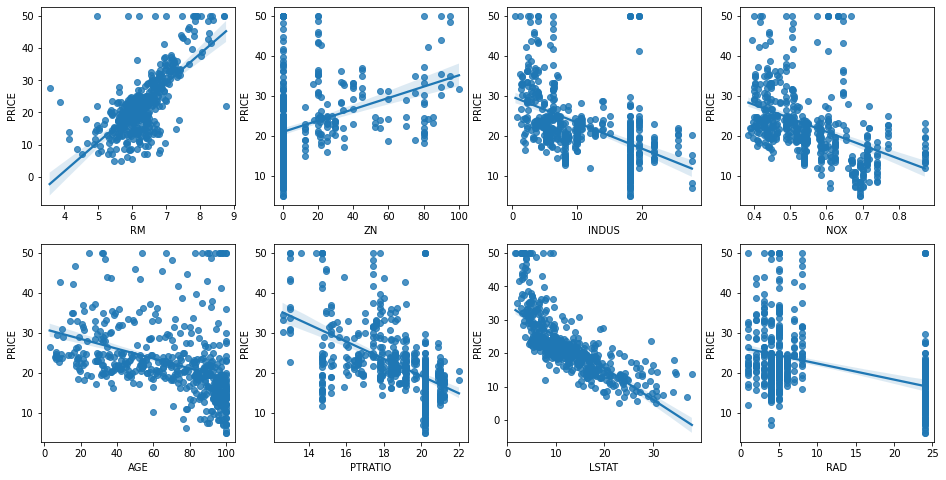

In [11]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [13]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.9955951721646
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score

y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', x)

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
def polynomial_func(x):
    y = 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [18]:
def polynomial_func(x):
    y=1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

x=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [19]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature: \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
    y = 1+2*x[:,0]+3*x[:,0**2]+4*x[:,1]**3
    return y
# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
x=np.arange(4).reshape(2,2)
y=polynomial_func(x)

model = model.fit(x, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.17 0.17 0.34 0.51 0.68 0.68 1.03 1.54 2.23]


#### 과적합 및 과소적합

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(x):
    return np.cos(1.5*np.pi*x)

np.random.seed(0)
n_samples=30
x=np.sort(np.random.rand(n_samples))

y=true_fun(x)+np.random.randn(n_samples)*0.1


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872320595 입니다.

Degree 15 회귀계수는 [-2.98291000e+03  1.03898890e+05 -1.87415330e+06  2.03715477e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08] 입니다.
Degree 15 MSE는 180513241.13976413 입니다.


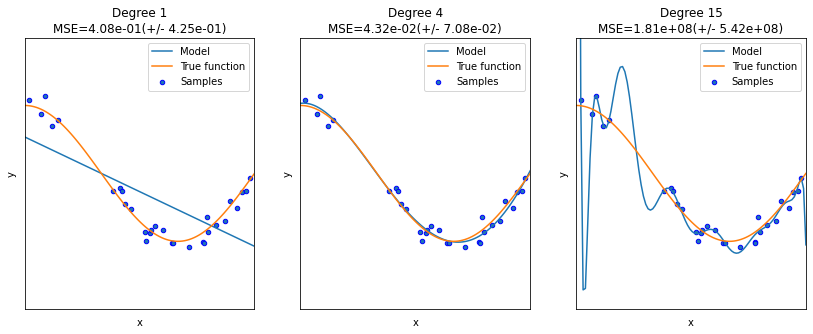

In [23]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(x.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    x_test = np.linspace(0,1,100)
    plt.plot(x_test, pipeline.predict(x_test[:,np.newaxis]), label="Model")
    
    plt.plot(x_test, true_fun(x_test), '-', label="True function")
    plt.scatter(x,y,edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

### Regularization

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


In [27]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


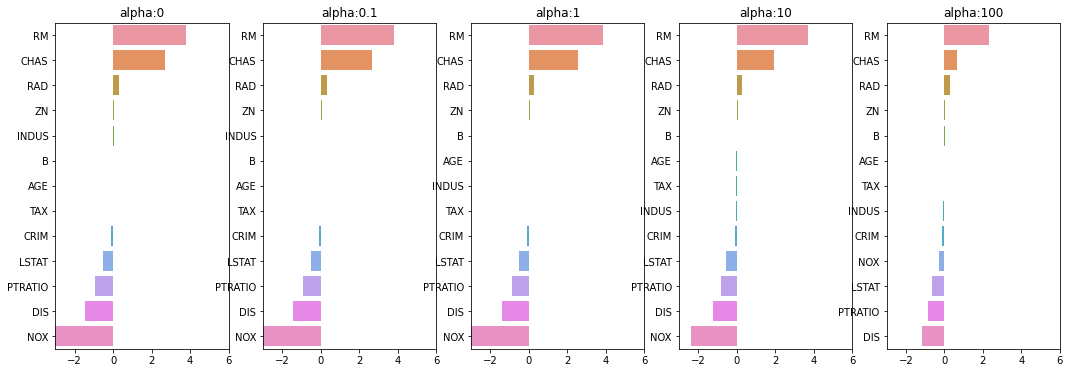

In [29]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐

In [30]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않음

In [39]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '#######')
    for param in params:
        if model_name =='Ridge': model=Ridge(alpha=param)
        elif model_name =='Lasso':model=Lasso(alpha=param)
        elif model_name =='ElasticNet':model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                         y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
            
        # corss_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
        
    return coeff_df

In [42]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n = y_target)

###### Lasso #######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.189


In [43]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [45]:
# l1_ratio는 0.7로 고정
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                    X_data_n=X_data, y_target_n=y_target)

###### ElasticNet #######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.068


In [46]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#### 데이터 변환

In [49]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) rufwjd
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method =='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1,1,10,100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
              ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                   input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                       y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 4.770
alpha 1일 때 5폴드 세트의 평